# SimFin Tutorial 01 - The Basics

[Original repository on GitHub](https://github.com/simfin/simfin-tutorials)

This tutorial was originally written by [Hvass Labs](https://github.com/Hvass-Labs)

## Introduction

Financial data used to be very expensive, typically costing USD 10-20,000 for an annual subscription, making it impossible for ordinary people to obtain the data. It was limited to banks and hedge funds which usually keep their research private, and academia which has proven unable to turn finance theory into a real science.

With the advent of XBRL data, US companies are now required to publish their financial data in digital form, which means it can be collected automatically into a database. Unfortunately, there are several challenges in collecting and standardizing the data, so companies have sprung up to provide that service at a very low cost.

However, the new data providers often have a complicated API, which is very far from how people will actually use the data. Every user has to build the infrastructure for downloading the data, saving it to disk, and loading it into a format that can actually be used in research and production.

The [SimFin Python API](https://www.github.com/SimFin/simfin) solves all these problems with a simple and elegant API, making it very easy to download and use the financial data. Furthermore, the basic SimFin datasets are all free, so you can easily share your research in Python Notebooks that automatically download the financial data, when people run the Notebook on their own computer or in the cloud using e.g. Google Colab.

This is a game-changer in how financial research can be created and shared. Hopefully it can break the monopoly of academia and the financial industry, so everyone with a good idea can now do research in finance.

This tutorial shows the basics of using the SimFin Python API.

## Installation

SimFin is available as a Python package for easy installation. To install SimFin you simply need to execute the following command (remove the \# first).

In [1]:
# !pip install simfin

### Virtual Environments

It is best to use a virtual environment when installing Python packages, so they are not installed inside your main Python installation. That makes it easy to remove the packages if something goes wrong. Please see the README file for this tutorial, for a detailed explanation on how to create virtual environments.

### Google Colab

If you do not wish to install anything on your local computer, you can run these tutorials entirely in the cloud using the free [Google Colab](https://colab.research.google.com) service. All the required Python packages should already be installed on Google Colab, except for SimFin which you can install by executing the above command. A virtual / temporary environment is automatically created on Google Colab each time you login, so you can install SimFin directly.

## Imports

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns

# Import the main functionality from the SimFin Python API.
import simfin as sf

# Import names used for easy access to SimFin's data-columns.
from simfin.names import *

In [3]:
# Version of the SimFin Python API.
sf.__version__

'0.1.0'

In [4]:
# Set the plotting style for Seaborn.
sns.set_style("whitegrid")

## Data Directory

Before using SimFin, you need to set the directory where the data is downloaded and stored. The directory is created automatically if it does not exist. If you forget to set this, then the data will be stored in your current directory.

In [5]:
sf.set_data_dir('~/simfin_data/')

## API Key

SimFin provides both free and paid versions of its data. Anyone can download the free data by using the API key 'free'. Visit (??? better link to dataset comparison) [SimFin](https://www.simfin.com) for a comparison of the free and paid versions, and to obtain your own API key.

In [6]:
sf.set_api_key(api_key='free')

The API key can also be loaded from disk. If the file doesn't exist, then it uses the default 'free' API key. This is useful if you want to share your Notebooks with others, without revealing your private API key.

In [7]:
# sf.load_api_key(path='~/simfin_api_key.txt', default_key='free')

## General Load Function

The general function for downloading and loading the bulk-data from the SimFin server is `sf.load()` which takes several arguments, with the main arguments being:

- The `dataset` to download e.g. 'income' for Income Statements, 'balance' for Balance Sheets, or 'cashflow' for Cash-Flow Statements, 'shareprices' for Share Prices, etc.

- The `variant` of the given dataset e.g. 'annual', 'quarterly' or 'ttm' (Trailing-Twelve-Months) for financial reports, or 'daily' for share-price data.

- The `market` for the dataset e.g. 'usa' or 'uk'. Note that this is currently not supported and should be left to `None` for all markets. ???

For example, we can use the `sf.load()` function to download and load all the annual Income Statements from the SimFin database into a Pandas DataFrame. The fundamental datasets are fairly small (a few MB per file) and should download and load very quickly.

In [8]:
df1 = sf.load(dataset='income', variant='annual', market=None)

Loading "income-annual" from disk (0 days old).


This gives us a Pandas DataFrame with all the data.

In [9]:
df1.head()

,Ticker,SimFinId,Currency,Fiscal Year,Fiscal Period,Report Date,Publish Date,Shares (Basic),Shares (Diluted),Revenue,...,Non-Operating Income (Loss),"Interest Expense, net","Pretax Income (Loss), Adjusted",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income Available to Common Shareholders
0,DAI.DE,825113,USD,1996,FY,1996-12-31,2019-01-15,NaN,NaN,5.548000e+09,...,NaN,NaN,6.070000e+08,3.710000e+08,978000000,NaN,978000000,NaN,976000000,976000000
1,DAI.DE,825113,EUR,1997,FY,1997-12-31,2019-01-15,NaN,NaN,1.175720e+11,...,633000000.0,NaN,6.180000e+09,6.547000e+09,12727000000,4.820000e+08,13209000000,NaN,13094000000,13094000000
2,DAI.DE,825113,USD,1998,FY,1998-12-31,2019-01-15,NaN,NaN,1.546150e+11,...,896000000.0,NaN,1.037000e+10,5.004000e+09,15374000000,NaN,15374000000,NaN,15221000000,15221000000
3,DAI.DE,825113,USD,1999,FY,1999-12-31,2019-01-15,NaN,NaN,1.510350e+11,...,335000000.0,NaN,9.724000e+09,6.460000e+08,10370000000,-3.747000e+09,6623000000,NaN,6623000000,6623000000
4,DAI.DE,825113,USD,2000,FY,2000-12-31,2019-01-15,NaN,NaN,1.524460e+11,...,NaN,NaN,4.056000e+09,4.923300e+09,8979300000,-1.630000e+09,7349300000,NaN,7349300000,7349300000


### Refresh Data

By default the data-files are downloaded every 30 days, which is a good choice for the free datasets, because the free data is several months old and is updated infrequently. We can set a different time-limit by passing the argument `refresh_days` to the `load()` function and its specializations described below. A value of `refresh_days=0` forces download of the dataset, regardless of when you downloaded it last and how old the data-file is on your disk. But even for paying subscribers, the SimFin server only updates the data-files daily, so you would normally use `refresh_days >= 1`. For example, if we want to refresh the data every 3 days:

In [10]:
df1 = sf.load(dataset='income', variant='annual', market=None,
             refresh_days=3)

Loading "income-annual" from disk (0 days old).


### Data Names

The data columns can be selected by their full names, for example:

In [11]:
df1['Selling, General & Administrative']

0       -6.520000e+08
1       -1.562100e+10
2       -1.904100e+10
3       -1.765500e+10
4       -1.677200e+10
             ...     
19377   -1.605800e+09
19378   -5.605500e+07
19379   -3.710820e+08
19380   -4.323700e+07
19381   -8.764800e+07
Name: Selling, General & Administrative, Length: 19382, dtype: float64

Some of the column-names are long and it is easy to make a mistake when typing them, so for convenience, there are short-hand names and brief explanations of all the data-columns in the `names` module that was imported further above. For example:

In [12]:
SGA

'Selling, General & Administrative'

In [13]:
df1[SGA]

0       -6.520000e+08
1       -1.562100e+10
2       -1.904100e+10
3       -1.765500e+10
4       -1.677200e+10
             ...     
19377   -1.605800e+09
19378   -5.605500e+07
19379   -3.710820e+08
19380   -4.323700e+07
19381   -8.764800e+07
Name: Selling, General & Administrative, Length: 19382, dtype: float64

### Indexing the DataFrame

The above DataFrame is not indexed by either the Ticker or any of the dates, so it is difficult to work with. The `sf.load()` function can also do this indexing for us, if we provide more arguments to the function. For example, if we want to index by the columns named "Ticker" and "Report Date" we pass those as an argument to the `sf.load()` function. Furthermore, we can instruct the `sf.load()` function to parse columns in the DataFrame that contain dates.

The reason these arguments have to be specified, is that the names of these data-columns are different amongst datasets. Specialized functions are shown further below, where the correct arguments are passed automatically.

In [14]:
df2 = sf.load(dataset='income', variant='annual', market=None,
              index=[TICKER, REPORT_DATE],
              parse_dates=[REPORT_DATE, PUBLISH_DATE])

Loading "income-annual" from disk (0 days old).


In [15]:
df2.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2007-10-31      45846      USD         2007            FY   2009-10-05   
       2008-10-31      45846      USD         2008            FY   2009-10-05   
       2009-10-31      45846      USD         2009            FY   2009-12-21   
       2010-10-31      45846      USD         2010            FY   2010-12-20   
       2011-10-31      45846      USD         2011            FY   2011-12-16   

                    Shares (Basic)  Shares (Diluted)       Revenue  \
Ticker Report Date                                                   
A      2007-10-31              NaN               NaN  5.420000e+09   
       2008-10-31      508200000.0       519400000.0  5.774000e+09   
       2009-10-31      484400000.0       484400000.0  4.481000e+09   
       2010-10-31      485800000.0       494200000.0  5.444000e+09   
       2011-10-31      485800000.0       497000000.0  6.615000e+09   

                    Cost of Revenue  Gross Profit  ...  \
Ticker Report Date                                 ...   
A      2007-10-31     -2.451000e+09  2.969000e+09  ...   
       2008-10-31     -2.578000e+09  3.196000e+09  ...   
       2009-10-31     -2.189000e+09  2.292000e+09  ...   
       2010-10-31     -2.514000e+09  2.930000e+09  ...   
       2011-10-31     -3.086000e+09  3.529000e+09  ...   

                    Non-Operating Income (Loss)  Interest Expense, net  \
Ticker Report Date                                                       
A      2007-10-31                    86000000.0             81000000.0   
       2008-10-31                    20000000.0            -10000000.0   
       2009-10-31                   -40000000.0            -59000000.0   
       2010-10-31                    -6000000.0            -76000000.0   
       2011-10-31                   -39000000.0            -72000000.0   

                    Pretax Income (Loss), Adjusted  Abnormal Gains (Losses)  \
Ticker Report Date                                                            
A      2007-10-31                     6.700000e+08                      NaN   
       2008-10-31                     8.150000e+08                      0.0   
       2009-10-31                     7.000000e+06                      0.0   
       2010-10-31                     5.600000e+08              132000000.0   
       2011-10-31                     1.032000e+09                      NaN   

                    Pretax Income (Loss)  Income Tax (Expense) Benefit, net  \
Ticker Report Date                                                            
A      2007-10-31              670000000                        -32000000.0   
       2008-10-31              815000000                       -122000000.0   
       2009-10-31                7000000                        -38000000.0   
       2010-10-31              692000000                         -8000000.0   
       2011-10-31             1032000000                        -20000000.0   

                    Income (Loss) from Continuing Operations  \
Ticker Report Date                                             
A      2007-10-31                                  638000000   
       2008-10-31                                  693000000   
       2009-10-31                                  -31000000   
       2010-10-31                                  684000000   
       2011-10-31                                 1012000000   

                    Net Extraordinary Gains (Losses)  Net Income  \
Ticker Report Date                                                 
A      2007-10-31                                NaN   638000000   
       2008-10-31                                NaN   693000000   
       2009-10-31                                NaN   -31000000   
       2010-10-31                                NaN   684000000   
       2011-10-31                                NaN  1012000000   

 

### Lookup Ticker

The DataFrame has now been indexed by both the Ticker and Report Date, so we can easily lookup the data for individual tickers e.g. MSFT for Microsoft:

In [16]:
df2.loc['MSFT']

,SimFinId,Currency,Fiscal Year,Fiscal Period,Publish Date,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,...,Non-Operating Income (Loss),"Interest Expense, net","Pretax Income (Loss), Adjusted",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income Available to Common Shareholders
Report Date,,,,,,,,,,,,,,,,,,,,,
2008-06-30,59265,USD,2008,FY,2009-10-23,9.328000e+09,9.470000e+09,6.042000e+10,-1.159800e+10,4.882200e+10,...,1.543000e+09,NaN,2.381400e+10,0.000000e+00,23814000000,-6.133000e+09,17681000000,NaN,17681000000,17681000000
2009-06-30,59265,USD,2009,FY,2009-10-23,8.945000e+09,8.996000e+09,5.843700e+10,-1.215500e+10,4.628200e+10,...,-5.420000e+08,NaN,1.982100e+10,NaN,19821000000,-5.252000e+09,14569000000,NaN,14569000000,14569000000
2010-06-30,59265,USD,2010,FY,2010-07-30,8.813000e+09,8.927000e+09,6.248400e+10,-1.239500e+10,5.008900e+10,...,9.150000e+08,NaN,2.501300e+10,0.000000e+00,25013000000,-6.253000e+09,18760000000,NaN,18760000000,18760000000
2011-06-30,59265,USD,2011,FY,2011-07-28,8.490000e+09,8.593000e+09,6.994300e+10,-1.557700e+10,5.436600e+10,...,9.100000e+08,NaN,2.807100e+10,0.000000e+00,28071000000,-4.921000e+09,23150000000,NaN,23150000000,23150000000
2012-06-30,59265,USD,2012,FY,2012-07-26,8.396000e+09,8.506000e+09,7.372300e+10,-1.753000e+10,5.619300e+10,...,5.040000e+08,NaN,2.846000e+10,-6.193000e+09,22267000000,-5.289000e+09,16978000000,NaN,16978000000,16978000000
2013-06-30,59265,USD,2013,FY,2013-07-30,8.375000e+09,8.470000e+09,7.784900e+10,-2.038500e+10,5.746400e+10,...,2.880000e+08,NaN,2.705200e+10,0.000000e+00,27052000000,-5.189000e+09,21863000000,NaN,21863000000,21863000000
2014-06-30,59265,USD,2014,FY,2014-07-31,8.299000e+09,8.399000e+09,8.683300e+10,-2.707800e+10,5.975500e+10,...,6.100000e+07,NaN,2.794700e+10,-1.270000e+08,27820000000,-5.746000e+09,22074000000,NaN,22074000000,22074000000
2015-06-30,59265,USD,2015,FY,2015-07-31,8.177000e+09,8.254000e+09,9.358000e+10,-3.303800e+10,6.054200e+10,...,3.460000e+08,NaN,2.851800e+10,-1.001100e+10,18507000000,-6.314000e+09,12193000000,NaN,12193000000,12193000000
2016-06-30,59265,USD,2016,FY,2016-07-28,7.925000e+09,8.013000e+09,9.115400e+10,-3.278000e+10,5.837400e+10,...,-4.390000e+08,NaN,2.674900e+10,-1.110000e+09,25639000000,-5.100000e+09,20539000000,NaN,20539000000,20539000000


From this DataFrame we can easily extract individual columns such as the Revenue:

In [17]:
df2.loc['MSFT'][REVENUE]

Report Date
2008-06-30    6.042000e+10
2009-06-30    5.843700e+10
2010-06-30    6.248400e+10
2011-06-30    6.994300e+10
2012-06-30    7.372300e+10
2013-06-30    7.784900e+10
2014-06-30    8.683300e+10
2015-06-30    9.358000e+10
2016-06-30    9.115400e+10
2017-06-30    9.657100e+10
2018-06-30    1.103600e+11
2019-06-30    1.258430e+11
Name: Revenue, dtype: float64

We can also plot this data:

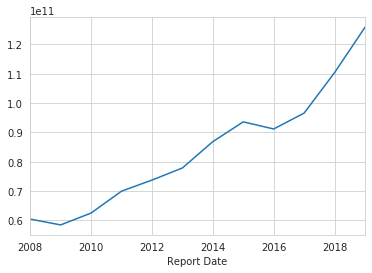

In [18]:
df2.loc['MSFT'][REVENUE].plot(grid=True)

## Specialized Load Functions

Some of the datasets have specialized load functions that automatically set the correct arguments for indexing and parsing dates.

### Load Income Statements

The dataset for Income Statements can also be loaded with the specialized function `sf.load_income()` which takes a single argument for the dataset variant:

In [19]:
df_income = sf.load_income(variant='annual')

Loading "income-annual" from disk (0 days old).


In [20]:
df_income.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2007-10-31      45846      USD         2007            FY   2009-10-05   
       2008-10-31      45846      USD         2008            FY   2009-10-05   
       2009-10-31      45846      USD         2009            FY   2009-12-21   
       2010-10-31      45846      USD         2010            FY   2010-12-20   
       2011-10-31      45846      USD         2011            FY   2011-12-16   

                    Shares (Basic)  Shares (Diluted)       Revenue  \
Ticker Report Date                                                   
A      2007-10-31              NaN               NaN  5.420000e+09   
       2008-10-31      508200000.0       519400000.0  5.774000e+09   
       2009-10-31      484400000.0       484400000.0  4.481000e+09   
       2010-10-31      485800000.0       494200000.0  5.444000e+09   
       2011-10-31      485800000.0       497000000.0  6.615000e+09   

                    Cost of Revenue  Gross Profit  ...  \
Ticker Report Date                                 ...   
A      2007-10-31     -2.451000e+09  2.969000e+09  ...   
       2008-10-31     -2.578000e+09  3.196000e+09  ...   
       2009-10-31     -2.189000e+09  2.292000e+09  ...   
       2010-10-31     -2.514000e+09  2.930000e+09  ...   
       2011-10-31     -3.086000e+09  3.529000e+09  ...   

                    Non-Operating Income (Loss)  Interest Expense, net  \
Ticker Report Date                                                       
A      2007-10-31                    86000000.0             81000000.0   
       2008-10-31                    20000000.0            -10000000.0   
       2009-10-31                   -40000000.0            -59000000.0   
       2010-10-31                    -6000000.0            -76000000.0   
       2011-10-31                   -39000000.0            -72000000.0   

                    Pretax Income (Loss), Adjusted  Abnormal Gains (Losses)  \
Ticker Report Date                                                            
A      2007-10-31                     6.700000e+08                      NaN   
       2008-10-31                     8.150000e+08                      0.0   
       2009-10-31                     7.000000e+06                      0.0   
       2010-10-31                     5.600000e+08              132000000.0   
       2011-10-31                     1.032000e+09                      NaN   

                    Pretax Income (Loss)  Income Tax (Expense) Benefit, net  \
Ticker Report Date                                                            
A      2007-10-31              670000000                        -32000000.0   
       2008-10-31              815000000                       -122000000.0   
       2009-10-31                7000000                        -38000000.0   
       2010-10-31              692000000                         -8000000.0   
       2011-10-31             1032000000                        -20000000.0   

                    Income (Loss) from Continuing Operations  \
Ticker Report Date                                             
A      2007-10-31                                  638000000   
       2008-10-31                                  693000000   
       2009-10-31                                  -31000000   
       2010-10-31                                  684000000   
       2011-10-31                                 1012000000   

                    Net Extraordinary Gains (Losses)  Net Income  \
Ticker Report Date                                                 
A      2007-10-31                                NaN   638000000   
       2008-10-31                                NaN   693000000   
       2009-10-31                                NaN   -31000000   
       2010-10-31                                NaN   684000000   
       2011-10-31                                NaN  1012000000   

 

### Load Balance Sheets

The dataset for Balance Sheets can also be loaded with the specialized function `sf.load_balance()` which takes a single argument for the dataset variant:

In [21]:
df_balance = sf.load_balance(variant='annual')

Loading "balance-annual" from disk (0 days old).


In [22]:
df_balance.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2008-10-31      45846      USD         2008            Q4   2009-10-05   
       2009-10-31      45846      USD         2009            Q4   2009-12-21   
       2010-10-31      45846      USD         2010            Q4   2010-12-20   
       2011-10-31      45846      USD         2011            Q4   2011-12-16   
       2012-10-31      45846      USD         2012            Q4   2012-12-20   

                    Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                     
A      2008-10-31      499800000.0       502600000.0   
       2009-10-31      480200000.0       480200000.0   
       2010-10-31      481600000.0       498400000.0   
       2011-10-31      484400000.0       494200000.0   
       2012-10-31      -69600000.0       -70600000.0   

                    Cash, Cash Equivalents & Short Term Investments  \
Ticker Report Date                                                    
A      2008-10-31                                      1.429000e+09   
       2009-10-31                                      2.493000e+09   
       2010-10-31                                      2.649000e+09   
       2011-10-31                                      3.527000e+09   
       2012-10-31                                      2.351000e+09   

                    Accounts & Notes Receivable   Inventories  ...  \
Ticker Report Date                                             ...   
A      2008-10-31                   770000000.0  6.460000e+08  ...   
       2009-10-31                   595000000.0  5.520000e+08  ...   
       2010-10-31                   869000000.0  7.160000e+08  ...   
       2011-10-31                   860000000.0  8.980000e+08  ...   
       2012-10-31                   923000000.0  1.014000e+09  ...   

                    Short Term Debt  Total Current Liabilities  \
Ticker Report Date                                               
A      2008-10-31               NaN               1.330000e+09   
       2009-10-31      1.000000e+06               1.123000e+09   
       2010-10-31      1.501000e+09               3.083000e+09   
       2011-10-31      2.530000e+08               1.837000e+09   
       2012-10-31      2.500000e+08               1.893000e+09   

                    Long Term Debt  Total Noncurrent Liabilities  \
Ticker Report Date                                                 
A      2008-10-31     2.125000e+09                  3.118000e+09   
       2009-10-31     2.904000e+09                  3.975000e+09   
       2010-10-31     2.190000e+09                  3.377000e+09   
       2011-10-31     1.932000e+09                  2.904000e+09   
       2012-10-31     2.112000e+09                  3.458000e+09   

                    Total Liabilities  \
Ticker Report Date                      
A      2008-10-31        4.448000e+09   
       2009-10-31        5.098000e+09   
       2010-10-31        6.460000e+09   
       2011-10-31        4.741000e+09   
       2012-10-31        5.351000e+09   

                    Share Capital & Additional Paid-In Capital  \
Ticker Report Date                                               
A      2008-10-31                                 7.416000e+09   
       2009-10-31                                 7.558000e+09   
       2010-10-31                                 7.910000e+09   
       2011-10-31                                 8.271000e+09   
       2012-10-31                                 8.495000e+09   

                    Treasury Stock  Retained Earnings  Total Equity  \
Ticker Report Date                                                    
A      2008-10-31    -7.470000e+09       2.791000e+09  2.559000e+09   
       2009-10-31    -7.627000e+09       2.760000e+09  2.514000e+09   
       2010-10-31    -8.038000e+09       3.444000e+09  3.236000e+09   
       2011-10-31    -8.

### Load Cash-Flow Statements

The dataset for Cash-Flow Statements can also be loaded with the specialized function `sf.load_cashflow()` which takes a single argument for the dataset variant:

In [23]:
df_cashflow = sf.load_cashflow(variant='annual')

Loading "cashflow-annual" from disk (0 days old).


In [24]:
df_cashflow.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2007-10-31      45846      USD         2007            FY   2009-10-05   
       2008-10-31      45846      USD         2008            FY   2009-10-05   
       2009-10-31      45846      USD         2009            FY   2009-12-21   
       2010-10-31      45846      USD         2010            FY   2010-12-20   
       2011-10-31      45846      USD         2011            FY   2011-12-16   

                    Shares (Basic)  Shares (Diluted)  \
Ticker Report Date                                     
A      2007-10-31              NaN               NaN   
       2008-10-31      508200000.0       519400000.0   
       2009-10-31      484400000.0       484400000.0   
       2010-10-31      485800000.0       494200000.0   
       2011-10-31      485800000.0       497000000.0   

                    Net Income/Starting Line  Depreciation & Amortization  \
Ticker Report Date                                                          
A      2007-10-31               6.380000e+08                  191000000.0   
       2008-10-31               6.930000e+08                  201000000.0   
       2009-10-31              -3.100000e+07                  162000000.0   
       2010-10-31               6.840000e+08                  202000000.0   
       2011-10-31               1.012000e+09                  253000000.0   

                    Non-Cash Items  ...  Cash from Operating Activities  \
Ticker Report Date                  ...                                   
A      2007-10-31       20000000.0  ...                       969000000   
       2008-10-31       41000000.0  ...                       756000000   
       2009-10-31      215000000.0  ...                       408000000   
       2010-10-31     -116000000.0  ...                       718000000   
       2011-10-31      219000000.0  ...                      1260000000   

                    Change in Fixed Assets & Intangibles  \
Ticker Report Date                                         
A      2007-10-31                           -142000000.0   
       2008-10-31                           -140000000.0   
       2009-10-31                           -127000000.0   
       2010-10-31                           -114000000.0   
       2011-10-31                           -170000000.0   

                    Net Change in Long Term Investment  \
Ticker Report Date                                       
A      2007-10-31                           13000000.0   
       2008-10-31                          150000000.0   
       2009-10-31                           94000000.0   
       2010-10-31                           38000000.0   
       2011-10-31                           16000000.0   

                    Net Cash From Acquisitions & Divestitures  \
Ticker Report Date                                              
A      2007-10-31                               -3.300000e+08   
       2008-10-31                               -1.720000e+08   
       2009-10-31                                4.300000e+07   
       2010-10-31                               -1.108000e+09   
       2011-10-31                               -9.700000e+07   

                    Cash from Investing Activities  Dividends Paid  \
Ticker Report Date                                                   
A      2007-10-31                    -4.560000e+08             NaN   
       2008-10-31                    -3.850000e+08             NaN   
       2009-10-31                    -4.000000e+06             NaN   
       2010-10-31                    -1.174000e+09             0.0   
       2011-10-31                     1.294000e+09             0.0   

                    Cash From (Repayment of) Debt  \
Ticker Report Date                                  
A      2007-10-31                    5.940000e+08   
       2008-10-31                    1.600000e+07   
      

### Report vs. Publish Date

By default the functions `sf.load_income()`, `sf.load_balance()` and `sf.load_cashflow()` use the Report Date as an index, but it can be switched to use the Publish Date instead, by setting the index argument:

In [25]:
df_income2 = sf.load_income(variant='annual', index=PUBLISH_DATE)

Loading "income-annual" from disk (0 days old).


In [26]:
df_income2.head()

SimFinId Currency  Fiscal Year Fiscal Period Report Date  \
Ticker Publish Date                                                             
A      2009-10-05       45846      USD         2007            FY  2007-10-31   
       2009-10-05       45846      USD         2008            FY  2008-10-31   
       2009-12-21       45846      USD         2009            FY  2009-10-31   
       2010-12-20       45846      USD         2010            FY  2010-10-31   
       2011-12-16       45846      USD         2011            FY  2011-10-31   

                     Shares (Basic)  Shares (Diluted)       Revenue  \
Ticker Publish Date                                                   
A      2009-10-05               NaN               NaN  5.420000e+09   
       2009-10-05       508200000.0       519400000.0  5.774000e+09   
       2009-12-21       484400000.0       484400000.0  4.481000e+09   
       2010-12-20       485800000.0       494200000.0  5.444000e+09   
       2011-12-16       485800000.0       497000000.0  6.615000e+09   

                     Cost of Revenue  Gross Profit  ...  \
Ticker Publish Date                                 ...   
A      2009-10-05      -2.451000e+09  2.969000e+09  ...   
       2009-10-05      -2.578000e+09  3.196000e+09  ...   
       2009-12-21      -2.189000e+09  2.292000e+09  ...   
       2010-12-20      -2.514000e+09  2.930000e+09  ...   
       2011-12-16      -3.086000e+09  3.529000e+09  ...   

                     Non-Operating Income (Loss)  Interest Expense, net  \
Ticker Publish Date                                                       
A      2009-10-05                     86000000.0             81000000.0   
       2009-10-05                     20000000.0            -10000000.0   
       2009-12-21                    -40000000.0            -59000000.0   
       2010-12-20                     -6000000.0            -76000000.0   
       2011-12-16                    -39000000.0            -72000000.0   

                     Pretax Income (Loss), Adjusted  Abnormal Gains (Losses)  \
Ticker Publish Date                                                            
A      2009-10-05                      6.700000e+08                      NaN   
       2009-10-05                      8.150000e+08                      0.0   
       2009-12-21                      7.000000e+06                      0.0   
       2010-12-20                      5.600000e+08              132000000.0   
       2011-12-16                      1.032000e+09                      NaN   

                     Pretax Income (Loss)  Income Tax (Expense) Benefit, net  \
Ticker Publish Date                                                            
A      2009-10-05               670000000                        -32000000.0   
       2009-10-05               815000000                       -122000000.0   
       2009-12-21                 7000000                        -38000000.0   
       2010-12-20               692000000                         -8000000.0   
       2011-12-16              1032000000                        -20000000.0   

                     Income (Loss) from Continuing Operations  \
Ticker Publish Date                                             
A      2009-10-05                                   638000000   
       2009-10-05                                   693000000   
       2009-12-21                                   -31000000   
       2010-12-20                                   684000000   
       2011-12-16                                  1012000000   

                     Net Extraordinary Gains (Losses)  Net Income  \
Ticker Publish Date                                                 
A      2009-10-05                                 NaN   638000000   
       2009-10-05                                 NaN   693000000   
       2009-12-21                                 NaN   -31000000   
       2010-12-20                                 NaN   684000000   
       2011-12-16      

The difference is as follows:

- Report Date is the date of the financial report, but this is not the date when the report was published. For example, an annual report with a Report Date of 2018-12-31 means that the period of the financial report is the 12 months ending on that date.

- Publish Date is the date the financial report was actually made public. For example, the financial report for the 12 months ending on 2018-12-31 was first made public a few months later on 2019-02-05.

Caveat: Sometimes financial reports are restated one or more times - sometimes even years later. The standard datasets always use the newest available data. In the future, SimFin may also provide datasets that contain all the original and restated reports.

### Trailing Twelve Months (TTM)

The dataset variant 'ttm' stands for Trailing Twelve Months. This dataset is calculated from the quarterly and annual reports, so as to create 4 data-points per year (once for each quarter), but covering the preceding 12 months instead of only 4 months in a normal quarter. This is useful for getting more data-points during a year. For example, we can use the TTM Income Statements when calculating P/E or P/Sales ratios (see further below).

In [27]:
df_income_ttm = sf.load_income(variant='ttm')

Loading "income-ttm" from disk (0 days old).


In [28]:
df_income_ttm.head()

SimFinId Currency  Fiscal Year Fiscal Period Publish Date  \
Ticker Report Date                                                              
A      2009-04-30      45846      USD         2009            Q2   2010-03-10   
       2009-07-31      45846      USD         2009            Q3   2009-10-05   
       2009-10-31      45846      USD         2009            Q4   2009-12-21   
       2010-01-31      45846      USD         2010            Q1   2010-03-10   
       2010-04-30      45846      USD         2010            Q2   2011-06-07   

                    Shares (Basic)  Shares (Diluted)       Revenue  \
Ticker Report Date                                                   
A      2009-04-30              NaN               NaN  5.182000e+09   
       2009-07-31              NaN               NaN  4.795000e+09   
       2009-10-31              NaN               NaN  4.481000e+09   
       2010-01-31              NaN               NaN  4.528000e+09   
       2010-04-30      484400000.0       488600000.0  4.708000e+09   

                    Cost of Revenue  Gross Profit  ...  \
Ticker Report Date                                 ...   
A      2009-04-30     -2.430000e+09  2.752000e+09  ...   
       2009-07-31     -2.307000e+09  2.488000e+09  ...   
       2009-10-31     -2.189000e+09  2.292000e+09  ...   
       2010-01-31     -2.165000e+09  2.363000e+09  ...   
       2010-04-30     -2.164000e+09  2.544000e+09  ...   

                    Non-Operating Income (Loss)  Interest Expense, net  \
Ticker Report Date                                                       
A      2009-04-30                    -6000000.0            -43000000.0   
       2009-07-31                   -43000000.0            -51000000.0   
       2009-10-31                   -40000000.0            -59000000.0   
       2010-01-31                   -54000000.0            -70000000.0   
       2010-04-30                   -58000000.0            -72000000.0   

                    Pretax Income (Loss), Adjusted  Abnormal Gains (Losses)  \
Ticker Report Date                                                            
A      2009-04-30                      441000000.0                      NaN   
       2009-07-31                      185000000.0                      NaN   
       2009-10-31                        7000000.0                      NaN   
       2010-01-31                       63000000.0                      NaN   
       2010-04-30                      260000000.0                      NaN   

                    Pretax Income (Loss)  Income Tax (Expense) Benefit, net  \
Ticker Report Date                                                            
A      2009-04-30              441000000                        -78000000.0   
       2009-07-31              185000000                        -10000000.0   
       2009-10-31                7000000                        -38000000.0   
       2010-01-31               63000000                        -79000000.0   
       2010-04-30              260000000                        -67000000.0   

                    Income (Loss) from Continuing Operations  \
Ticker Report Date                                             
A      2009-04-30                                  363000000   
       2009-07-31                                  175000000   
       2009-10-31                                  -31000000   
       2010-01-31                                  -16000000   
       2010-04-30                                  193000000   

                    Net Extraordinary Gains (Losses)  Net Income  \
Ticker Report Date                                                 
A      2009-04-30                                NaN   363000000   
       2009-07-31                                NaN   175000000   
       2009-10-31                                NaN   -31000000   
       2010-01-31                                NaN   -16000000   
       2010-04-30                                NaN   193000000   

 

### Load Share-Prices

The dataset for Share-Prices can also be loaded with the specialized function `sf.load_shareprices()` which takes a single argument for the dataset variant, which currently only supports 'daily' share-prices. The zip-file being downloaded is nearly 100 MB and the extracted CSV-file is nearly 400 MB. Both these file-sizes may grow significantly in the future, as more stocks are added to the database. But it should still be reasonably fast to download and load this dataset from a modern harddisk.

In [29]:
%%time
df_prices = sf.load_shareprices(variant='daily')

Loading "shareprices-daily" from disk (3 days old).
CPU times: user 11.7 s, sys: 1.23 s, total: 12.9 s
Wall time: 11.5 s


In [30]:
df_prices.head()

SimFinId     Open      Low     High    Close  Adj. Close  \
Ticker Date                                                                   
A      2007-01-03     45846  25.0286  24.3562  25.3791  24.5351       22.79   
       2007-01-04     45846  24.5351  23.9342  24.7496  24.6137       22.87   
       2007-01-05     45846  24.5351  24.3210  24.6066  24.3848       22.65   
       2007-01-08     45846  24.3062  24.0916  24.3777  24.2990       22.57   
       2007-01-09     45846  24.3777  24.0558  24.5494  24.3276       22.60   

                   Dividend   Volume  
Ticker Date                           
A      2007-01-03       NaN  3599200  
       2007-01-04       NaN  2899000  
       2007-01-05       NaN  3741800  
       2007-01-08       NaN  2176900  
       2007-01-09       NaN  1937900

Each data-row contains the following items:

- Ticker and SimFinId for identifying the stock.
- Date for the trading-day.
- Open, Low, High, Close for the share-prices for that day. These are all adjusted for stock-splits but NOT adjusted for dividends.
- Adj. Close which is the day's closing share-price adjusted for BOTH stock-splits AND dividends, so the dividends have been reinvested back into the stock without having to pay any taxes. This is also known as the Total Return of the stock.
- Dividend per share paid on that day, adjusted for stock-splits.
- Volume, which is how many stocks were traded that day, adjusted for stock-splits.

When calculating stock-returns you should always use the Adj. Close share-price because it takes both stock-splits and dividends into account. This is especially important over longer periods because the dividend reinvestment can be a significant part of the returns.

But when calculating valuation ratios such as P/E or P/Sales you should use the Close share-price instead, which is only adjusted for stock-splits. If you were to use the Adj. Close share-price then you would distort the valuation ratios.

For example, the stock with ticker MSFT has the following share-price data:

In [31]:
df_prices.loc['MSFT'].head()

,SimFinId,Open,Low,High,Close,Adj. Close,Dividend,Volume
Date,,,,,,,,
2007-01-03,59265,29.9100,29.40,30.25,29.86,22.32,NaN,76935100
2007-01-04,59265,29.7000,29.44,29.97,29.81,22.28,NaN,45774500
2007-01-05,59265,29.6307,29.45,29.75,29.64,22.16,NaN,44607200
2007-01-08,59265,29.6500,29.53,30.10,29.93,22.37,NaN,50220200
2007-01-09,59265,30.0000,29.73,30.18,29.96,22.40,NaN,44636600


We can plot the daily closing-price for the MSFT stock. We use the name `CLOSE` as an easy reference:

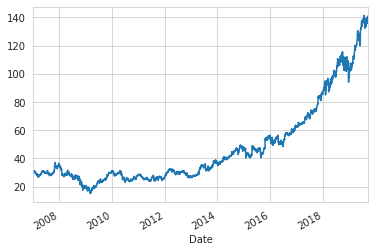

In [32]:
df_prices.loc['MSFT'][CLOSE].plot(grid=True)

By default, we use the name `SHARE_PRICE` as a synonym for the daily closing price:

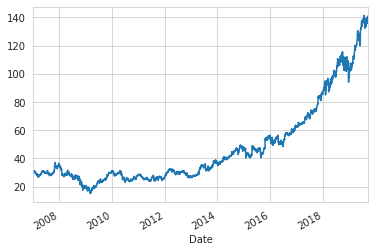

In [33]:
df_prices.loc['MSFT'][SHARE_PRICE].plot(grid=True)

We use the name `TOTAL_RETURN` as a synonym for `ADJ_CLOSE`, which is the daily closing share-price, adjusted for BOTH stock-splits AND reinvestment of dividends:

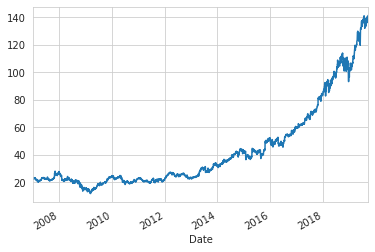

In [34]:
df_prices.loc['MSFT'][TOTAL_RETURN].plot(grid=True)

We can then compare the Share Price to the Total Return to see the effect of dividend reinvestment (assuming there are no taxes).

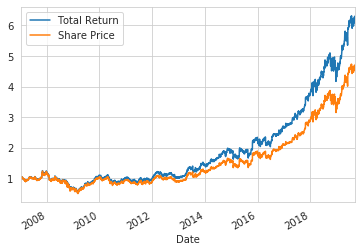

In [35]:
# Get the relevant data.
df = df_prices.loc['MSFT'][[TOTAL_RETURN, SHARE_PRICE]].copy()

# Rename the columns.
df.rename(columns={TOTAL_RETURN: 'Total Return',
                   SHARE_PRICE: 'Share Price'}, inplace=True)

# Normalize to begin at 1.0
df /= df.values[0]

# Plot it.
df.plot(grid=True)

We will show further below how to calculate valuation ratios such as P/Sales.

### Load Company Details

The dataset for company details can also be loaded with the specialized function `sf.load_companies()`. This can either be indexed by `TICKER` (which may not be unique) or `SIMFIN_ID` (which is unique). By default it is indexed by `TICKER`.

In [36]:
df_companies = sf.load_companies(index=TICKER)

Loading "companies" from disk (1 days old).


In [37]:
df_companies.head()

,SimFinId,Company Name,IndustryId
Ticker,,,
A,45846,AGILENT TECHNOLOGIES INC,106001.0
AA,367153,Alcoa Corp,110004.0
AAC,939324,"AAC Holdings, Inc.",NaN
AAL,68568,American Airlines Group Inc.,100006.0
AAMC,847094,Altisource Asset Management Corp,104001.0


For example, we can lookup the details for the company with ticker MSFT:

In [38]:
df_companies.loc['MSFT']

SimFinId                 59265
Company Name    MICROSOFT CORP
IndustryId              101003
Name: MSFT, dtype: object

### Load Sector and Industry Details

The dataset for details of sectors and industries can also be loaded with the specialized function `sf.load_industries()`.

In [39]:
df_industries = sf.load_industries()

Loading "industries" from disk (1 days old).


In [40]:
df_industries.head()

,Sector,Industry
IndustryId,,
100001,Industrials,Industrial Products
100002,Industrials,Business Services
100003,Industrials,Engineering & Construction
100004,Industrials,Waste Management
100005,Industrials,Industrial Distribution


For example, we can lookup the Industry ID associated with the MSFT stock.

In [41]:
industry_id = df_companies.loc['MSFT'][INDUSTRY_ID]
industry_id

101003.0

We can then lookup the industry and sector details for that Industry ID.

In [42]:
df_industries.loc[industry_id]

Sector                Technology
Industry    Application Software
Name: 101003, dtype: object

## Calculate Net Profit Margin

This is an example of how to create new data-columns using a single DataFrame. In this example we will calculate the Net Profit Margin which is the fraction of the company's sales that are turned into profits for the shareholders. It is defined as the Net Income divided by the Revenue, both of which are found in the Income Statement. This shows it for a single company with the ticker AMZN (Amazon).

In [43]:
# Define a name for the data-column.
# Many typical names are already imported from sf.names
NET_PROFIT_MARGIN = 'Net Profit Margin'

# Copy the data for the ticker AMZN.
# We will be adding new columns to this DataFrame so it
# is best to copy it explicitly to create a new DataFrame.
df = df_income.loc['AMZN'].copy()

# Calculate the Net Profit Margin and add a new column
# to the DataFrame.
df[NET_PROFIT_MARGIN] = df[NET_INCOME] / df[REVENUE]

In [44]:
df[NET_PROFIT_MARGIN]

Report Date
2007-12-31    0.032086
2008-12-31    0.033653
2009-12-31    0.036803
2010-12-31    0.033680
2011-12-31    0.013125
2012-12-31   -0.000638
2013-12-31    0.003680
2014-12-31   -0.002708
2015-12-31    0.005570
2016-12-31    0.017435
2017-12-31    0.017052
2018-12-31    0.043253
Name: Net Profit Margin, dtype: float64

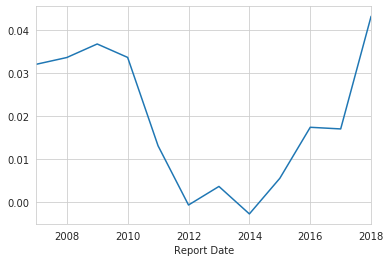

In [45]:
df[NET_PROFIT_MARGIN].plot(grid=True)

We can also calculate the Net Profit Margin for *all* Income Statements by updating that DataFrame directly:

In [46]:
df_income[NET_PROFIT_MARGIN] = df_income[NET_INCOME] / df_income[REVENUE]

In [47]:
df_income[NET_PROFIT_MARGIN]

Ticker  Report Date
A       2007-10-31     0.117712
        2008-10-31     0.120021
        2009-10-31    -0.006918
        2010-10-31     0.125643
        2011-10-31     0.152986
                         ...   
NaN     2013-01-31     0.002806
        2014-01-31    -0.082835
        2015-01-31    -0.023623
        2016-01-31    -0.011015
        2017-01-31    -0.003120
Name: Net Profit Margin, Length: 19382, dtype: float64

We can then extract the Net Profit Margin from this DataFrame for any ticker, for example:

In [48]:
df_income.loc['AMZN'][NET_PROFIT_MARGIN]

Report Date
2007-12-31    0.032086
2008-12-31    0.033653
2009-12-31    0.036803
2010-12-31    0.033680
2011-12-31    0.013125
2012-12-31   -0.000638
2013-12-31    0.003680
2014-12-31   -0.002708
2015-12-31    0.005570
2016-12-31    0.017435
2017-12-31    0.017052
2018-12-31    0.043253
Name: Net Profit Margin, dtype: float64

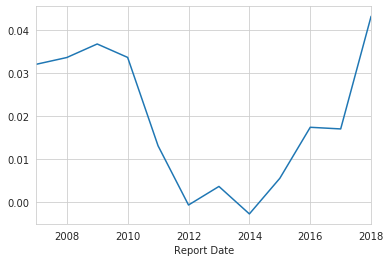

In [49]:
df_income.loc['AMZN'][NET_PROFIT_MARGIN].plot(grid=True)

## Calculate Return on Equity (One Stock)

When a company releases a new financial report, it is split into 3 separate financial statements known as the Income Statement, Balance Sheet, and Cash-Flow Statement, which are stored in 3 different simfin datasets. Some financial calculations involve data from two or more of these datasets. This is an example of how to make calculations by combining data from two different simfin datasets: The annual Income Statements and Balance Sheets.

In [50]:
df_income = sf.load_income(variant='annual')
df_balance = sf.load_balance(variant='annual')

Loading "income-annual" from disk (0 days old).
Loading "balance-annual" from disk (0 days old).


We will first consider a single company with the ticker MSFT. From the Income Statement we will use the data for Net Income.

In [51]:
net_income = df_income.loc['MSFT'][NET_INCOME]

In [52]:
net_income.head()

Report Date
2008-06-30    17681000000
2009-06-30    14569000000
2010-06-30    18760000000
2011-06-30    23150000000
2012-06-30    16978000000
Name: Net Income, dtype: int64

From the Balance Sheet we will use the data for Shareholder's Total Equity.

In [53]:
equity = df_balance.loc['MSFT'][TOTAL_EQUITY]

In [54]:
equity.head()

Report Date
2009-06-30    3.955800e+10
2010-06-30    4.617500e+10
2011-06-30    5.708300e+10
2012-06-30    6.636300e+10
2013-06-30    7.894400e+10
Name: Total Equity, dtype: float64

### Return on Equity - Basic Formula

The Return on Equity (ROE) is a measure of how much profit is generated on the capital that shareholders have invested in the company through direct cash payments and retained earnings throughout the years.

There are different ways of defining and calculating ROE. The first formula is simply the Net Income for a given year $t$ divided by the Shareholder's Equity for the same year $t$.

$$
ROE_t = \frac{Net\ Income_t}{Equity_t}
$$

This is very easy to calculate from the data we extracted above:

In [55]:
roe = net_income / equity

In [56]:
roe.head()

Report Date
2008-06-30         NaN
2009-06-30    0.368295
2010-06-30    0.406280
2011-06-30    0.405550
2012-06-30    0.255835
dtype: float64

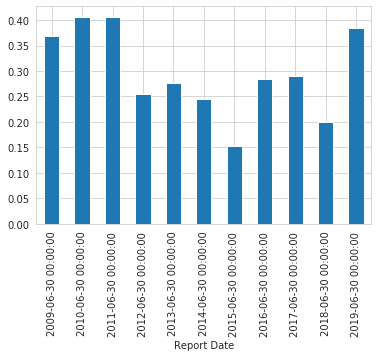

In [57]:
roe.dropna().plot(kind='bar')

### Return on Equity - Shifted Equity

We might argue that the above formula for $ROE_t$ is inaccurate because the Net Income and Equity are taken from the same period $t$. The problem is that $Net\ Income_t$ is generated in some year $t$ e.g. between January 1. and December 31. 2015, and some or all of these earnings may be retained and hence be a (possibly substantial) part of $Equity_t$ on December 31. 2015. This would distort the true return on shareholder's equity.

A simple solution is to calculate the ROE from the Net Income in a given year $t$ divided by the Equity in the previous year:

$$
ROE_t = \frac{Net\ Income_t}{Equity_{t - 1\ Year}}
$$

This can be done by shifting the time-series for the Net Income one step backwards in time.

In [58]:
roe = net_income.shift(-1) / equity

Or equivalently it can be done by shifting the Equity time-series on step forwards in time.

In [59]:
roe = net_income / equity.shift(1)

In [60]:
roe.head()

Report Date
2008-06-30         NaN
2009-06-30         NaN
2010-06-30    0.474240
2011-06-30    0.501354
2012-06-30    0.297427
dtype: float64

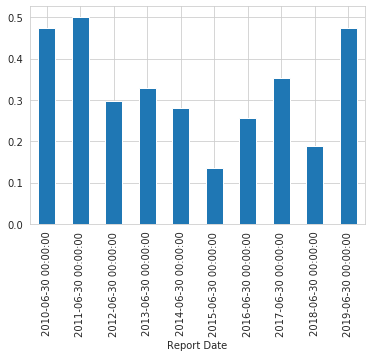

In [61]:
roe.dropna().plot(kind='bar')

### Return on Equity - Average Equity

We might also argue that the above formula for $ROE_t$ using shifted Equity data is inaccurate, for example if the company has raised new equity capital by issuing new shares during the year, then $Equity_{t - 1\ Year}$ would be too low for calculating $ROE_t$.

A simple solution is to use the average of the Equity from the current and previous years:

$$
ROE_t = \frac{Net\ Income_t}{\frac{1}{2} \cdot \left( Equity_t + Equity_{t - 1\ Year} \right) }
$$

This can be calculated very easily using Pandas built-in `rolling` functionality:

In [62]:
equity_mean = equity.rolling(window=2).mean()

In [63]:
equity_mean.head()

Report Date
2009-06-30             NaN
2010-06-30    4.286650e+10
2011-06-30    5.162900e+10
2012-06-30    6.172300e+10
2013-06-30    7.265350e+10
Name: Total Equity, dtype: float64

In [64]:
roe = net_income / equity_mean

In [65]:
roe.head()

Report Date
2008-06-30         NaN
2009-06-30         NaN
2010-06-30    0.437638
2011-06-30    0.448391
2012-06-30    0.275068
dtype: float64

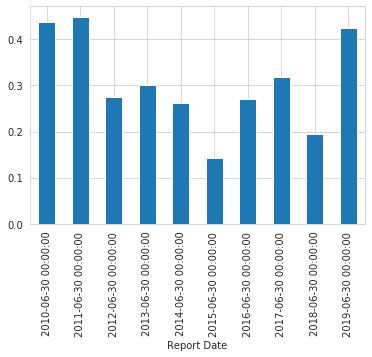

In [66]:
roe.dropna().plot(kind='bar')

## Calculating Return on Equity (Multiple Stocks)

We can make calculations for several stocks simultaneously that use multiple simfin datasets. We will again calculate the Return on Equity (ROE) to demonstrate this.

We will do this calculation for 3 different stocks simultaneously, and we will plot the results towards the end. Because these 3 companies have different reporting dates, the final plot can become a bit messy if we use the REPORT_DATE of the financial data. We will therefore use the FISCAL_YEAR as the index instead of the REPORT_DATE. This is done very easily by passing it as an argument to the load-functions.

In [67]:
df_income = sf.load_income(variant='annual', index=FISCAL_YEAR)
df_balance = sf.load_balance(variant='annual', index=FISCAL_YEAR)

Loading "income-annual" from disk (0 days old).
Loading "balance-annual" from disk (0 days old).


We will calculate the ROE for these 3 stock-tickers.

In [68]:
tickers = ['MSFT', 'AMZN', 'AAPL']

First we extract the Net Income and Shareholder Equity for these 3 stocks.

In [69]:
net_income = df_income.loc[tickers][NET_INCOME]

In [70]:
equity = df_balance.loc[tickers][TOTAL_EQUITY]

Then we calculate the Return on Equity (ROE) using the shifted formula from above:

$$
ROE_t = \frac{Net\ Income_t}{Equity_{t - 1\ Year}}
$$

In [71]:
roe = net_income.shift(1) / equity

By default the new data is unnamed. To make the tables and plots more descriptive, we can assign a name to the data. This name is taken from simfin's imported module `names.py` which defines many commonly used names.

In [72]:
roe = roe.rename(ROE)

In [73]:
roe.head()

Ticker  Fiscal Year
AAPL    2007                NaN
        2008           0.156748
        2009           0.193394
        2010           0.172313
        2011           0.182902
Name: Return on Equity, dtype: float64

We can remove all rows with missing data 'NaN'.

In [74]:
roe = roe.dropna()

Because there is only one data-column, Pandas uses the simpler Series-object to store and handle the data. We can convert it to a DataFrame-object e.g. if we want to show a table.

In [75]:
pd.DataFrame(roe).head()

Return on Equity
Ticker Fiscal Year                  
AAPL   2008                 0.156748
       2009                 0.193394
       2010                 0.172313
       2011                 0.182902
       2012                 0.219288

This can now be plotted using the more advanced plotting package called Seaborn, which combines the plots for these 3 stocks using different colour-codes for the stocks. Note that we have to call `reset_index()` on the data before it is passed to the plotting-function.

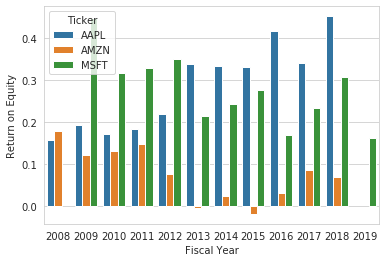

In [76]:
sns.barplot(x=FISCAL_YEAR, y=ROE, hue=TICKER,
            data=roe.reset_index())

## Resample Data (One Stock)

The fundamental data is only provided at quarterly or annual intervals, corresponding to the financial reports of the companies. If we want to calculate daily valuation ratios such as P/E or P/Sales then we first need to upsample the fundamental data.

We will use the dataset with annual Income Statements in these examples, although you might want to use the TTM-data instead, to get 4 data-points per year instead of just 1.

In [77]:
df = sf.load_income(variant='annual')

Loading "income-annual" from disk (0 days old).


We can extract the Revenue for the ticker MSFT.

In [78]:
df2 = df.loc['MSFT'][REVENUE]
df2.head()

Report Date
2008-06-30    6.042000e+10
2009-06-30    5.843700e+10
2010-06-30    6.248400e+10
2011-06-30    6.994300e+10
2012-06-30    7.372300e+10
Name: Revenue, dtype: float64

This can be upsampled to daily data using Pandas' built-in resampling functionality.

In [79]:
df2.resample('D').ffill()

Report Date
2008-06-30    6.042000e+10
2008-07-01    6.042000e+10
2008-07-02    6.042000e+10
2008-07-03    6.042000e+10
2008-07-04    6.042000e+10
                  ...     
2019-06-26    1.103600e+11
2019-06-27    1.103600e+11
2019-06-28    1.103600e+11
2019-06-29    1.103600e+11
2019-06-30    1.258430e+11
Freq: D, Name: Revenue, Length: 4018, dtype: float64

Let us try and extract more data-columns for a single company.

In [80]:
df3 = df.loc['MSFT'][[REVENUE, NET_INCOME]]
df3.head()

,Revenue,Net Income
Report Date,,
2008-06-30,6.042000e+10,17681000000
2009-06-30,5.843700e+10,14569000000
2010-06-30,6.248400e+10,18760000000
2011-06-30,6.994300e+10,23150000000
2012-06-30,7.372300e+10,16978000000


We can also upsample multiple data-columns for a single company.

In [81]:
df3.resample('D').ffill()

,Revenue,Net Income
Report Date,,
2008-06-30,6.042000e+10,17681000000
2008-07-01,6.042000e+10,17681000000
2008-07-02,6.042000e+10,17681000000
2008-07-03,6.042000e+10,17681000000
2008-07-04,6.042000e+10,17681000000
...,...,...
2019-06-26,1.103600e+11,16571000000
2019-06-27,1.103600e+11,16571000000
2019-06-28,1.103600e+11,16571000000


If we plot the upsampled data, we see the time-series have steps. This is because we have used the 'forward fill' option when resampling the data, which uses the last-known values.

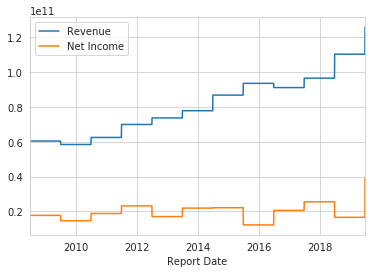

In [82]:
df3.resample('D').ffill().plot(grid=True)

We can also fill in the missing values using linear interpolation between the known values. This is a form of cheating because we are using data before it is actually known (the same can be said of using REPORT_DATE instead of PUBLISH_DATE). This is still useful for some forms of analysis, but you should not use it when back-testing trading strategies.

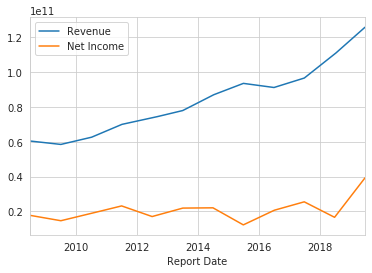

In [83]:
df3.resample('D').interpolate(method='linear').plot(grid=True)

### Helper Function

Resampling data for a single stock is fairly simple using Pandas' built-in functionality. But it gets very complicated for DataFrames with multiple stocks, because there seems to be some problems with Pandas' semantics (v. 0.25.1). A small helper-function is therefore provided in simfin which can resample DataFrames with either one or multiple stocks.

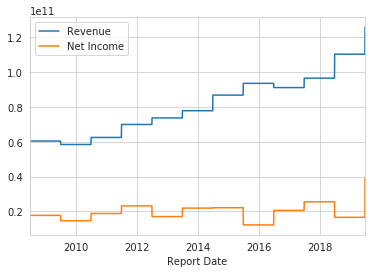

In [84]:
sf.resample_daily(df=df3, method='ffill').plot(grid=True)

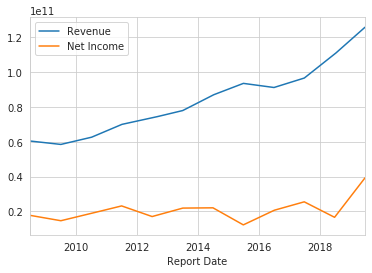

In [85]:
sf.resample_daily(df=df3, method='linear').plot(grid=True)

## Resample Data (Multiple Stocks)

Using simfin's helper-function it is easy to resample data for multiple stocks. We will again be using the dataset for annual Income Statements in these examples.

In [86]:
df = sf.load_income(variant='annual')

Loading "income-annual" from disk (0 days old).


The dataset contains thousands of stocks. In these examples we will just use these stocks.

In [87]:
tickers = ['MSFT', 'AMZN', 'AAPL']

We can then extract several data-columns for these stock-tickers.

In [88]:
df2 = df.loc[tickers][[REVENUE, NET_INCOME]]
df2.head()

Revenue   Net Income
Ticker Report Date                           
AAPL   2007-09-30   2.457800e+10   3495000000
       2008-09-30   3.749100e+10   6119000000
       2009-09-30   4.290500e+10   8235000000
       2010-09-30   6.522500e+10  14013000000
       2011-09-30   1.082490e+11  25922000000

The DataFrame with multiple stocks and several data-columns can be upsampled very easily using simfin's helper-function.

In [89]:
df3 = sf.resample_daily(df=df2, method='ffill')
df3.head()

Revenue  Net Income
Ticker Report Date                          
AAPL   2007-09-30   2.457800e+10  3495000000
       2007-10-01   2.457800e+10  3495000000
       2007-10-02   2.457800e+10  3495000000
       2007-10-03   2.457800e+10  3495000000
       2007-10-04   2.457800e+10  3495000000

We can plot the upsampled data for the ticker MSFT. The upsampling was done using the last-known values (aka. 'forward fill') which shows up as steps in the plot.

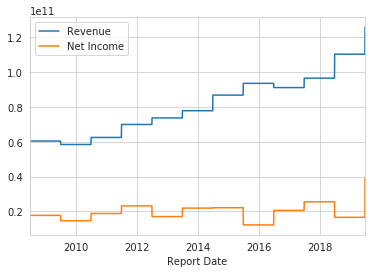

In [90]:
df3.loc['MSFT'].plot(grid=True)

We can also interpolate between known values when doing the upsampling by setting the argument `method='linear'` instead of `'ffill'`. As noted above, this is a form of cheating, because we are using data before it was actually known. This should not be done in trading strategies, although it is still useful in some data-analysis.

In [91]:
df4 = sf.resample_daily(df=df2, method='linear')
df4.head()

Revenue    Net Income
Ticker Report Date                            
AAPL   2007-09-30   2.457800e+10  3.495000e+09
       2007-10-01   2.461328e+10  3.502169e+09
       2007-10-02   2.464856e+10  3.509339e+09
       2007-10-03   2.468384e+10  3.516508e+09
       2007-10-04   2.471913e+10  3.523678e+09

We can also plot the interpolated data for one of the stock-tickers e.g. MSFT.

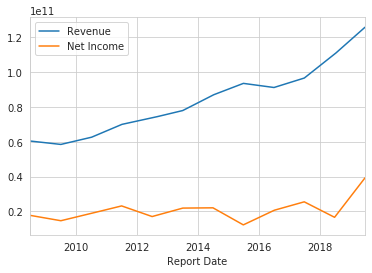

In [92]:
df4.loc['MSFT'].plot(grid=True)

## Calculate P/Sales Ratio (One Stock)

Now that we know how to upsample financial data, we may use it to calculate valuation ratios such as P/Sales which is defined as the daily share-price divided by the Sales Per Share for the trailing twelve months (TTM).

First we load the dataset with TTM Income Statements.

In [93]:
df_income_ttm = sf.load_income(variant='ttm')

Loading "income-ttm" from disk (0 days old).


In this example we will consider a single stock with ticker MSFT. We calculate its Sales Per Share as the Revenue (aka. Sales) divided by the number of diluted shares outstanding. The TTM data is quarterly so we get 4 data-points per year for the Sales Per Share.

In [94]:
df = df_income_ttm.loc['MSFT']

In [95]:
df[SHARES_DILUTED]

Report Date
2009-06-30    8.996000e+09
2009-09-30    8.946000e+09
2009-12-31    8.955250e+09
2010-03-31    8.948250e+09
2010-06-30    8.927000e+09
2010-09-30    8.855000e+09
2010-12-31    8.759750e+09
2011-03-31    8.668250e+09
2011-06-30    8.593000e+09
2011-09-30    8.541750e+09
2011-12-31    8.515500e+09
2012-03-31    8.512500e+09
2012-06-30    8.506000e+09
2012-09-30    8.507000e+09
2012-12-31    8.501750e+09
2013-03-31    8.484500e+09
2013-06-30    8.470000e+09
2013-09-30    8.455000e+09
2013-12-31    8.442750e+09
2014-03-31    8.427250e+09
2014-06-30    8.399000e+09
2014-09-30    8.378250e+09
2014-12-31    8.353750e+09
2015-03-31    8.321250e+09
2015-06-30    8.254000e+09
2015-09-30    8.187250e+09
2015-12-31    8.125750e+09
2016-03-31    8.062750e+09
2016-06-30    8.013000e+09
2016-09-30    7.961000e+09
2016-12-31    7.905750e+09
2017-03-31    7.862750e+09
2017-06-30    7.832000e+09
2017-09-30    7.812750e+09
2017-12-31    7.782750e+09
2018-03-31    7.778000e+09
2018-06-30    7.

In [96]:
sales_per_share = df[REVENUE] / df[SHARES_DILUTED]

In [97]:
sales_per_share.head()

Report Date
2009-06-30    6.495887
2009-09-30    6.292868
2009-12-31    6.553586
2010-03-31    6.654262
2010-06-30    6.999440
dtype: float64

The quarterly Sales Per Share data is then upsampled to daily data. In this example we will use the 'forward fill' method of upsampling, which uses the last-known value.

In [98]:
sales_per_share_daily = sf.resample_daily(df=sales_per_share,
                                          method='ffill')

In [99]:
sales_per_share_daily.head()

Report Date
2009-06-30    6.495887
2009-07-01    6.495887
2009-07-02    6.495887
2009-07-03    6.495887
2009-07-04    6.495887
Freq: D, dtype: float64

Then we extract the daily share-price for this stock.

In [100]:
share_price_daily = df_prices.loc['MSFT'][SHARE_PRICE]

Finally we calculate the P/Sales ratio as the daily share-price divided by the daily Sales Per Share. Note that these per-share numbers are already adjusted for stock-splits (if any).

In [101]:
psales = share_price_daily / sales_per_share_daily

The index for this Pandas Series is the index from `share_price_daily`. So if we do not have Sales Per Share data for a given date in the index, then the table shows 'NaN' which means 'Not-a-Number' because the number is unknown - it is not necessarily zero.

In [102]:
psales.head()

2007-01-03   NaN
2007-01-04   NaN
2007-01-05   NaN
2007-01-08   NaN
2007-01-09   NaN
dtype: float64

These 'NaN' can easily be removed.

In [103]:
psales = psales.dropna()
psales.head()

2009-06-30    3.659238
2009-07-01    3.700803
2009-07-02    3.597661
2009-07-06    3.571491
2009-07-07    3.468348
dtype: float64

The P/Sales ratio can then be plotted.

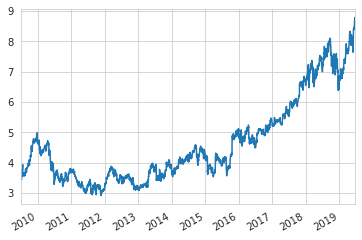

In [104]:
psales.plot(grid=True)

## Calculate P/Sales Ratio (Multiple Stocks)

Calculating valuation ratios such as P/Sales for multiple stocks is also fairly easy, if you do it the correct way.

First we extract the data for the stock-tickers we are interested in, from the TTM Income Statements that we loaded above.

In [105]:
tickers = ['MSFT', 'AMZN', 'AAPL']
df = df_income_ttm.loc[tickers]

Then we calculate the Sales Per Share for these stocks, for all the available data-points.

In [106]:
sales_per_share = df[REVENUE] / df[SHARES_DILUTED]
sales_per_share.head()

Ticker  Report Date
AAPL    2009-03-31     6.537275
        2009-06-30     6.884864
        2009-09-30     6.757720
        2009-12-31     7.319809
        2010-03-31     7.968248
dtype: float64

Then we upsample the Sales Per Share to daily data-points using the 'forward fill' method.

In [107]:
sales_per_share_daily = sf.resample_daily(df=sales_per_share,
                                          method='ffill')
sales_per_share_daily.head()

0
Ticker Report Date          
AAPL   2009-03-31   6.537275
       2009-04-01   6.537275
       2009-04-02   6.537275
       2009-04-03   6.537275
       2009-04-04   6.537275

The way Pandas works when doing arithmetic operations using two DataFrames, is that it matches both the index-names and the column-names. So if we are doing these calculations the "wrong" way, we will have to rename columns in order for it to work.

It is easier to create a new DataFrame as a copy of the share-price DataFrame, and add the Sales Per Share data as a new column to that DataFrame, and then finally add the P/Sales ratio as another column.

First we copy the relevant column from the DataFrame with share-prices. Note that `SHARE_PRICE` is actually given as a list `[SHARE_PRICE]` which means that the result is a Pandas DataFrame, otherwise the result would be a Pandas Series, which we cannot add more columns to.

In [108]:
df2 = df_prices.loc[tickers][[SHARE_PRICE]].copy()
df2.head()

Close
Ticker Date               
AAPL   2007-01-03  11.9714
       2007-01-04  12.2371
       2007-01-05  12.1500
       2007-01-08  12.2100
       2007-01-09  13.2243

Then we add the daily Sales Per Share as a new column to this DataFrame.

In [109]:
df2[SALES_PER_SHARE] = sales_per_share_daily

The index for this DataFrame is the index from the original share-price data. So if we do not have Sales Per Share data for a given date, then the table shows 'NaN' which means 'Not-a-Number' because the number is unknown - it is not necessarily zero.

Furthermore, because the Sales Per Share data has been upsampled from quarterly data-points, it will also have dates for which there was no stock-trading e.g. weekends and holidays. But again because the new DataFrame is indexed by the share-price data, the Sales Per Share data-points for weekends etc. is simply discarded when the data is added as a new column to this DataFrame. So the result is that we only have the dates which were in the original share-price data.

In [110]:
df2.head()

Close  Sales Per Share
Ticker Date                                
AAPL   2007-01-03  11.9714              NaN
       2007-01-04  12.2371              NaN
       2007-01-05  12.1500              NaN
       2007-01-08  12.2100              NaN
       2007-01-09  13.2243              NaN

We can remove all the 'NaN' values from the DataFrame.

In [111]:
df2 = df2.dropna()

In [112]:
df2.head()

Close  Sales Per Share
Ticker Date                                
AAPL   2009-03-31  15.0171         6.537275
       2009-04-01  15.5271         6.537275
       2009-04-02  16.1014         6.537275
       2009-04-03  16.5700         6.537275
       2009-04-06  16.9214         6.537275

Now the DataFrame contains the daily share-price and the upsampled daily Sales Per Share, so we can finally calculate the P/Sales for all the stocks in the DataFrame.

In [113]:
df2[PSALES] = df2[SHARE_PRICE] / df2[SALES_PER_SHARE]

In [114]:
df2.head()

Close  Sales Per Share   P/Sales
Ticker Date                                          
AAPL   2009-03-31  15.0171         6.537275  2.297150
       2009-04-01  15.5271         6.537275  2.375164
       2009-04-02  16.1014         6.537275  2.463014
       2009-04-03  16.5700         6.537275  2.534695
       2009-04-06  16.9214         6.537275  2.588448

We can extract and plot the P/Sales ratio for a single stock e.g. MSFT.

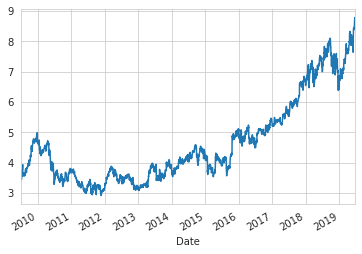

In [115]:
df2.loc['MSFT'][PSALES].plot(grid=True)

We can also use the more advanced plotting package called Seaborn to plot the P/Sales ratios for all the stocks in the DataFrame with different colours. Note that we have to call `reset_index()` on the DataFrame before it is passed to the Seaborn plotting-function.

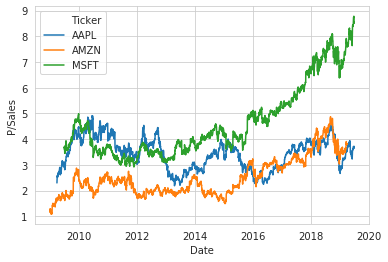

In [116]:
sns.lineplot(x=DATE, y=PSALES, hue=TICKER, data=df2.reset_index())

## Server Errors

If the SimFin server returns an error, then it raises an exception named `sf.ServerException` which is a sub-class of Python's built-in `Exception` class.

For example, we can try and load a dataset from the SimFin server that requires a paid subscription and a valid API key. ??? Will this dataset-name be changed to columns=all?

In [117]:
try:
    df = sf.load(dataset='income-full')
except sf.ServerException as e:
    print(e)

Dataset "income-full" does not exist on disk, downloading ... 
SimFin server error: An api key is needed for premium datasets, please append your api-key to the query using the 'api-key' parameter.


We can also try and load a dataset that does not exist on the SimFin server, which gives another error message.

In [118]:
try:
    df = sf.load(dataset='grays-sports-almanac')
except sf.ServerException as e:
    print(e)

Dataset "grays-sports-almanac" does not exist on disk, downloading ... 
SimFin server error: The specified dataset was not found.


Many other types of exceptions can also be raised e.g. if there is no internet connection, or if there are problems with your disk, etc.

## License (MIT)

This is published under the
[MIT License](https://github.com/simfin/simfin-tutorials/blob/master/LICENSE)
which allows very broad use for both academic and commercial purposes.

You are very welcome to modify and use this source-code in your own project. Please keep a link to the [original repository](https://github.com/simfin/simfin-tutorials).
